In [1]:
import pandas as pd
import numpy as np
import os
import re
from scipy.stats.stats import pearsonr
import time
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

In [3]:
dataset_path = r'C:\Users\ycg3\Desktop\feature_selection.arff'
dataset = pd.read_csv(dataset_path)

In [4]:
# Read in the features and labels
X = dataset.iloc[:, :-1].values  # All the columns but the last one are features
Y = dataset.iloc[:, -1].values  # The last column is the label

In [5]:
# Split the dataset into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0)

In [6]:
# Train the classifier
rfc = RandomForestClassifier(n_estimators=30, n_jobs=4)#, random_state=10)  # Use 4 CPU cores in parallel
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature ranking:
1. feature 1 (0.056470)
2. feature 77 (0.053959)
3. feature 12 (0.037280)
4. feature 2 (0.036107)
5. feature 23 (0.036080)
6. feature 24 (0.033120)
7. feature 3 (0.032326)
8. feature 8 (0.030829)
9. feature 6 (0.029574)
10. feature 7 (0.026693)
11. feature 5 (0.026344)
12. feature 78 (0.024645)
13. feature 125 (0.022969)
14. feature 86 (0.022478)
15. feature 73 (0.021651)
16. feature 20 (0.021420)
17. feature 119 (0.017861)
18. feature 21 (0.017082)
19. feature 11 (0.017078)
20. feature 31 (0.016996)
21. feature 117 (0.016855)
22. feature 122 (0.016235)
23. feature 81 (0.015339)
24. feature 74 (0.015172)
25. feature 19 (0.014765)
26. feature 126 (0.014542)
27. feature 57 (0.014009)
28. feature 118 (0.013515)
29. feature 14 (0.013028)
30. feature 123 (0.013021)
31. feature 121 (0.012201)
32. feature 10 (0.011113)
33. feature 85 (0.010850)
34. feature 9 (0.010810)
35. feature 103 (0.010293)
36. feature 56 (0.010258)
37. feature 30 (0.009881)
38. feature 120 (0.009812)
39

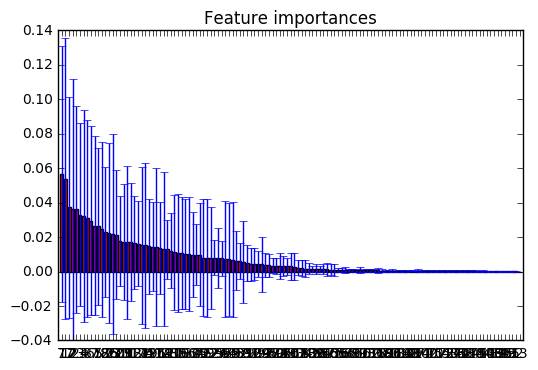

In [7]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(len(importances)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices],
                    color="r", yerr=std[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlim([-1, len(importances)])
plt.show()